# Dublin Bus Route Leave Times DataSet

The purpose of this notebook is to apply the CRISPDM steps of data understanding and data preparation, using 
the **Leavetimes data** provided by Dublin Bus. Due to the size of the dataset it is necessary to sample it based on a route. This has been undertaken in the in the notebook labelled **Route_DataExtractionNotebook**. The inported data is then used to prepare a  **Data Quality Report** and the **Data Quality Plan** for the given dataset. 

### For the leavetimes dataset, we have the folowing columns and explanations for each of them taken from the National Transport Authority concept design document :
- DATASOURCE: used to identify the system from which the data arrives.
- DAYOFSERVICE: (linked with the same column in the trips dataset) The day of the journey
- TRIPID: (linked with the same column in the trips dataset) Unique code for the journey
- PROGRNUMBER: Sequential position of the stop point in the trip
- STOPPOINTID: Unique ID for the bus stop at this point of the trip
- PLANNEDTIME_ARR: Planned arrival time at the stop point, in seconds from midnight of the day of the jounrey
- PLANNEDTIME_DEP: Planned departure time at the stop point, in seconds from midnight of the day of the jounrey
- ACTUALTIME_ARR: Actual arrival time at the stop point, in seconds from midnight of the day of the jounrey
- ACTUALTIME_DEP: Actual departure time at the stop point, in seconds from midnight of the day of the jounrey
- VEHICLEID: Unique vehicle code arriving at this stop point
- PASSENGERS: Number of passengers on board (since the previous stop)
- PASSENGERSIN: Number of passengers that boarded the bus at the previous stop
- PASSENGERSOUT: Number of passengers that alighted the bus at the previous stop
- DISTANCE: Distance measured from the beginning of the trip
- SUPPRESSED: When the trip is partially suppressed it says that the previous link is suppressed (0 =achieved, 1 = suppressed)
- JUSTIFICATIONID: Fault code
- LASTUPDATE: Time of the last record update
- NOTE: Free note

## Data Understanding: Data Quality Report
The data quality report uses tables and visualisations to explore the data.
For each feature in the dataframe, we prepare summary tables (with descriptive stats) and plots.

   **Tables:** One table for continuous features, one table for categorical features. We need to have an understanding of what the features measure, to be able to decide an initial grouping of features into continuous and categorical.

   **Plots:** For continuous features, we prepare 
histograms. For categorical features, we prepare bar plots.

In [1]:
#Import the required packages
#Import package pandas for data analysis
import pandas as pd

import datetime as dt

from datetime import datetime
from matplotlib import pyplot as plt

#For showing plots directly in the notebook run the command below
%matplotlib inline

# For saving multiple plots into a single pdf file
from matplotlib.backends.backend_pdf import PdfPages

## Route Parameters

In [2]:
RouteNum = '46A' 
RouteLeavetimes = f'Route_{RouteNum}_Leavetimes.csv'
RouteLeavetimesCleaned = f'{RouteNum}/{RouteNum}_CleanedLeavetimes.csv'


## Read the csv file for route leavetimes data

In [3]:
# Reading from a csv file, into a data frame
df = pd.read_csv(RouteLeavetimes)
# Show data frame first few rows
df

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,01-JAN-18 00:00:00,5970412,1,807,84600,84600,84442,84442,2868385,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
1,DB,01-JAN-18 00:00:00,5970412,2,808,84644,84644,84617,84617,2868385,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
2,DB,01-JAN-18 00:00:00,5970412,3,809,84670,84670,84631,84631,2868385,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
3,DB,01-JAN-18 00:00:00,5970412,6,812,84754,84754,84676,84676,2868385,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
4,DB,01-JAN-18 00:00:00,5970412,7,813,84776,84776,84691,84691,2868385,NaN,NaN,NaN,NaN,NaN,NaN,08-JAN-18 17:21:10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347782,DB,31-DEC-18 00:00:00,8577864,1,2039,33000,33000,33126,33126,3265666,NaN,NaN,NaN,NaN,NaN,NaN,16-JAN-19 18:27:21,NaN
4347783,DB,31-DEC-18 00:00:00,8583659,1,2039,67200,67200,67044,67044,3370455,NaN,NaN,NaN,NaN,NaN,NaN,16-JAN-19 18:27:21,NaN
4347784,DB,31-DEC-18 00:00:00,8579935,1,2039,72000,72000,72081,72081,2868333,NaN,NaN,NaN,NaN,NaN,NaN,16-JAN-19 18:27:21,NaN
4347785,DB,31-DEC-18 00:00:00,8589276,1,2039,64800,64800,64818,64818,3265701,NaN,NaN,NaN,NaN,NaN,NaN,16-JAN-19 18:27:21,NaN


In [4]:
# Check the number of rows and columns within the dataframe
df.shape

(4347787, 18)

- The dataset has a total of **813,832 rows** and **18 columns** .

### What datatypes are each column?

In [5]:
# Analyse the types of data based on their type and decide which would be better as a continuous or categorical columns
df.dtypes

DATASOURCE          object
DAYOFSERVICE        object
TRIPID               int64
PROGRNUMBER          int64
STOPPOINTID          int64
PLANNEDTIME_ARR      int64
PLANNEDTIME_DEP      int64
ACTUALTIME_ARR       int64
ACTUALTIME_DEP       int64
VEHICLEID            int64
PASSENGERS         float64
PASSENGERSIN       float64
PASSENGERSOUT      float64
DISTANCE           float64
SUPPRESSED         float64
JUSTIFICATIONID    float64
LASTUPDATE          object
NOTE               float64
dtype: object

In [6]:
# Descriptive stats for the leavetimes dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TRIPID,4347787.0,7.147953e+06,7.400387e+05,5955250.0,6.583873e+06,7.103377e+06,8.020193e+06,8.591175e+06
PROGRNUMBER,4347787.0,3.085228e+01,1.766707e+01,1.0,1.600000e+01,3.100000e+01,4.600000e+01,6.500000e+01
STOPPOINTID,4347787.0,1.738182e+03,1.514804e+03,2.0,7.860000e+02,9.070000e+02,2.045000e+03,7.689000e+03
PLANNEDTIME_ARR,4347787.0,5.312911e+04,1.695360e+04,18900.0,3.860100e+04,5.290700e+04,6.694300e+04,8.716200e+04
PLANNEDTIME_DEP,4347787.0,5.312911e+04,1.695360e+04,18900.0,3.860100e+04,5.290700e+04,6.694300e+04,8.716200e+04
ACTUALTIME_ARR,4347787.0,5.330270e+04,1.696315e+04,18798.0,3.871300e+04,5.309900e+04,6.720100e+04,8.953700e+04
ACTUALTIME_DEP,4347787.0,5.331849e+04,1.696245e+04,18798.0,3.872700e+04,5.311500e+04,6.721800e+04,8.953700e+04
VEHICLEID,4347787.0,1.702914e+06,7.544140e+05,1000142.0,1.000558e+06,1.001193e+06,2.406888e+06,3.393877e+06
PASSENGERS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PASSENGERSIN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Look at column names to check for spaces. 
df.columns

Index(['DATASOURCE', 'DAYOFSERVICE', 'TRIPID', 'PROGRNUMBER', 'STOPPOINTID',
       'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR',
       'ACTUALTIME_DEP', 'VEHICLEID', 'PASSENGERS', 'PASSENGERSIN',
       'PASSENGERSOUT', 'DISTANCE', 'SUPPRESSED', 'JUSTIFICATIONID',
       'LASTUPDATE', 'NOTE'],
      dtype='object')

In [8]:
# Get the number of unique values for all features
df.nunique()

DATASOURCE             1
DAYOFSERVICE         360
TRIPID             23279
PROGRNUMBER           65
STOPPOINTID          126
PLANNEDTIME_ARR    65347
PLANNEDTIME_DEP    65347
ACTUALTIME_ARR     68077
ACTUALTIME_DEP     68069
VEHICLEID            320
PASSENGERS             0
PASSENGERSIN           0
PASSENGERSOUT          0
DISTANCE               0
SUPPRESSED             2
JUSTIFICATIONID     2795
LASTUPDATE           360
NOTE                   0
dtype: int64

In [9]:
# Missing data
df.isnull().sum()

DATASOURCE               0
DAYOFSERVICE             0
TRIPID                   0
PROGRNUMBER              0
STOPPOINTID              0
PLANNEDTIME_ARR          0
PLANNEDTIME_DEP          0
ACTUALTIME_ARR           0
ACTUALTIME_DEP           0
VEHICLEID                0
PASSENGERS         4347787
PASSENGERSIN       4347787
PASSENGERSOUT      4347787
DISTANCE           4347787
SUPPRESSED         4314723
JUSTIFICATIONID    4314723
LASTUPDATE               0
NOTE               4347787
dtype: int64

Based on examining the data, folowing will be categorical  features are categorical and the rest continuous.

- *'DATASOURCE'* will be converted to **categorical** because it contains only a single value possible value for the company, Dublin Bus in this case.
- *'TRIPID'* column will be converted to **categorical** because it contains a finite set of possible values, each representing a different Trip, thus a different category.
- *'PROGRNUMBER'* column will be converted to **categorical** because it contains a finite set of possible values, each representing a different stop on the route.
- *'STOPPOINTID'* column will be converted to **categorical** because it contains a finite set of possible values, each representing a different stop identification on the route.
- *'VEHICLEID'* column will be converted to **categorical** because it contains a finite set of possible values, each representing a different meaning
- *'SUPPRESSED'* column will be converted to **categorical** because it contains only 2 possible values, *(0 and 1)*.
- *'JUSTIFICATIONID'* column will be converted to **categorical** because it contains a finite set of possible values, *(1-99)*, each representing a different meaning
- *'NOTE'* column will be converted to **categorical** but has no unique values.

In [10]:
# Select columns containing categorical data
categorical_columns = df[['DATASOURCE','TRIPID','PROGRNUMBER','STOPPOINTID','VEHICLEID','SUPPRESSED', 'JUSTIFICATIONID','NOTE' ]].columns

for column in categorical_columns:
    df[column] = df[column].astype('category')  
df.dtypes

DATASOURCE         category
DAYOFSERVICE         object
TRIPID             category
PROGRNUMBER        category
STOPPOINTID        category
PLANNEDTIME_ARR       int64
PLANNEDTIME_DEP       int64
ACTUALTIME_ARR        int64
ACTUALTIME_DEP        int64
VEHICLEID          category
PASSENGERS          float64
PASSENGERSIN        float64
PASSENGERSOUT       float64
DISTANCE            float64
SUPPRESSED         category
JUSTIFICATIONID    category
LASTUPDATE           object
NOTE               category
dtype: object

In [11]:
# Select columns containing dtatetime data
#datetime_columns= df[['PLANNEDTIME_ARR','PLANNEDTIME_DEP','ACTUALTIME_ARR','ACTUALTIME_DEP']].columns

# convert seconds to datetime
#for column in datetime_columns:
    #df[column] = df[column].astype('timedelta64[s]')
    #df[column] =pd.to_timedelta(df[column], unit='s')
    #df[column] =pd.to_datetime(df[column], unit='s').dt.strftime("%H:%M:%S")
    
# convert DAYOFERVICE to datetime
df['DAYOFSERVICE'] = pd.to_datetime(df['DAYOFSERVICE'])   

# convert LASTUPDATE to datetime
df['LASTUPDATE'] = pd.to_datetime(df['LASTUPDATE'])

df.dtypes

DATASOURCE               category
DAYOFSERVICE       datetime64[ns]
TRIPID                   category
PROGRNUMBER              category
STOPPOINTID              category
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR              int64
ACTUALTIME_DEP              int64
VEHICLEID                category
PASSENGERS                float64
PASSENGERSIN              float64
PASSENGERSOUT             float64
DISTANCE                  float64
SUPPRESSED               category
JUSTIFICATIONID          category
LASTUPDATE         datetime64[ns]
NOTE                     category
dtype: object

In [12]:
# Specify the continuous columns set
continuous_columns = df.select_dtypes(['datetime64[ns]', 'float64', 'int64']).columns
continuous_columns

Index(['DAYOFSERVICE', 'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR',
       'ACTUALTIME_DEP', 'PASSENGERS', 'PASSENGERSIN', 'PASSENGERSOUT',
       'DISTANCE', 'LASTUPDATE'],
      dtype='object')

In [13]:
df[continuous_columns].head()

,DAYOFSERVICE,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,LASTUPDATE
0,2018-01-01,84600,84600,84442,84442,NaN,NaN,NaN,NaN,2018-01-08 17:21:10
1,2018-01-01,84644,84644,84617,84617,NaN,NaN,NaN,NaN,2018-01-08 17:21:10
2,2018-01-01,84670,84670,84631,84631,NaN,NaN,NaN,NaN,2018-01-08 17:21:10
3,2018-01-01,84754,84754,84676,84676,NaN,NaN,NaN,NaN,2018-01-08 17:21:10
4,2018-01-01,84776,84776,84691,84691,NaN,NaN,NaN,NaN,2018-01-08 17:21:10


### Check for duplicate rows/columns

In [14]:
# duplicate rows
print("Number of duplicated (excluding first) rows in the CSV file is:", df.duplicated().sum())
print("Number of duplicated (including first) rows in the CSV file is:", df[df.duplicated(keep=False)].shape[0])

Number of duplicated (excluding first) rows in the CSV file is: 0
Number of duplicated (including first) rows in the CSV file is: 0


In [15]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
#dfT = df.T
#print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
#print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

In [16]:
df.nunique()

DATASOURCE             1
DAYOFSERVICE         360
TRIPID             23279
PROGRNUMBER           65
STOPPOINTID          126
PLANNEDTIME_ARR    65347
PLANNEDTIME_DEP    65347
ACTUALTIME_ARR     68077
ACTUALTIME_DEP     68069
VEHICLEID            320
PASSENGERS             0
PASSENGERSIN           0
PASSENGERSOUT          0
DISTANCE               0
SUPPRESSED             2
JUSTIFICATIONID     2795
LASTUPDATE           360
NOTE                   0
dtype: int64

In [17]:
# Check whether PLANNEDTIME_ARR has the same values as PLANNEDTIME_ARR
df['PLANNEDTIME_ARR'].equals(df['PLANNEDTIME_ARR'])

True

In [18]:
# Check whether ACTUALTIME_ARR has the same values as ACTUALTIME_DEP
df['ACTUALTIME_ARR'].equals(df['ACTUALTIME_DEP'])

False

#### Result - Duplicate rows exist

- Rows - There are no duplicate columns in the dataset. 
- Columns - There are 2 duplicate columns PLANNEDTIME_ARR and PLANNEDTIME_DEP. Analysis the number of unique values indicate that the columns PASSENGERS, PASSENGERSIN, PASSENGERSOUT, DISTANCE and NOTE are constant columns and can be dropped. These columns can be safely dropped as they add no information.

## Descriptive statistics: Continuous features

In [19]:
# Analyse the summary stats table for continuous features
df[continuous_columns].describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max,std
DAYOFSERVICE,4347787,2018-06-28 05:31:46.160077312,2018-01-01 00:00:00,2018-03-29 00:00:00,2018-06-26 00:00:00,2018-09-28 00:00:00,2018-12-31 00:00:00,NaN
PLANNEDTIME_ARR,4347787.0,53129.113409,18900.0,38601.0,52907.0,66943.0,87162.0,16953.597318
PLANNEDTIME_DEP,4347787.0,53129.113409,18900.0,38601.0,52907.0,66943.0,87162.0,16953.597318
ACTUALTIME_ARR,4347787.0,53302.697302,18798.0,38713.0,53099.0,67201.0,89537.0,16963.150023
ACTUALTIME_DEP,4347787.0,53318.494096,18798.0,38727.0,53115.0,67218.0,89537.0,16962.45479
PASSENGERS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PASSENGERSIN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PASSENGERSOUT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DISTANCE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LASTUPDATE,4347787,2018-07-15 22:35:26.791723776,2018-01-08 17:21:10,2018-04-09 08:59:24,2018-07-06 10:29:10,2018-10-26 15:03:16,2019-01-16 18:27:21,NaN


In [20]:
# Prepare %missing column
continuous_columns_missing  = 100 * (df[continuous_columns].isnull().sum()/df.shape[0])
# store the values in a dataframe to be added to the 
df_continuous_missing = pd.DataFrame(continuous_columns_missing, columns=['%missing'])
df_continuous_missing

,%missing
DAYOFSERVICE,0.0
PLANNEDTIME_ARR,0.0
PLANNEDTIME_DEP,0.0
ACTUALTIME_ARR,0.0
ACTUALTIME_DEP,0.0
PASSENGERS,100.0
PASSENGERSIN,100.0
PASSENGERSOUT,100.0
DISTANCE,100.0
LASTUPDATE,0.0


In [21]:
# Check the cardinality of the continuous dataset
df_continuous_card = df[continuous_columns].nunique()
# store the values in a dataframe
df_continuous_card = pd.DataFrame(df_continuous_card, columns=['card'])
df_continuous_card

,card
DAYOFSERVICE,360
PLANNEDTIME_ARR,65347
PLANNEDTIME_DEP,65347
ACTUALTIME_ARR,68077
ACTUALTIME_DEP,68069
PASSENGERS,0
PASSENGERSIN,0
PASSENGERSOUT,0
DISTANCE,0
LASTUPDATE,360


In [22]:
# Calculating the first date (Min)
min = df[continuous_columns].min().T
df_table_min = pd.DataFrame(min, columns=['Min'])
df_table_min

,Min
DAYOFSERVICE,2018-01-01 00:00:00
PLANNEDTIME_ARR,18900
PLANNEDTIME_DEP,18900
ACTUALTIME_ARR,18798
ACTUALTIME_DEP,18798
PASSENGERS,NaN
PASSENGERSIN,NaN
PASSENGERSOUT,NaN
DISTANCE,NaN
LASTUPDATE,2018-01-08 17:21:10


In [23]:
# Calculating the last date (Min)
max = df[continuous_columns].max().T
df_table_max = pd.DataFrame(max, columns=['Min'])
df_table_max

,Min
DAYOFSERVICE,2018-12-31 00:00:00
PLANNEDTIME_ARR,87162
PLANNEDTIME_DEP,87162
ACTUALTIME_ARR,89537
ACTUALTIME_DEP,89537
PASSENGERS,NaN
PASSENGERSIN,NaN
PASSENGERSOUT,NaN
DISTANCE,NaN
LASTUPDATE,2019-01-16 18:27:21


In [24]:
# Add missing values column
df_table_continuous = df[continuous_columns].describe(datetime_is_numeric=True).T

# Put the columns together to prepare the final table for numeric_columns
df_continuous_columns_data_quality_report_table = pd.concat([df_table_continuous, df_continuous_missing, df_continuous_card, df_table_min,df_table_max ], axis=1)

# Print data quality report table for numeric features to a file.
#df_continuous_columns_data_quality_report_table.to_csv("DublinBusLeavetimes-DataQualityReport-ContinuousFeatures-Table.csv", 
                                         #index_label='Feature')
df_continuous_columns_data_quality_report_table

,count,mean,min,25%,50%,75%,max,std,%missing,card,Min,Min
DAYOFSERVICE,4347787,2018-06-28 05:31:46.160077312,2018-01-01 00:00:00,2018-03-29 00:00:00,2018-06-26 00:00:00,2018-09-28 00:00:00,2018-12-31 00:00:00,NaN,0.0,360,2018-01-01 00:00:00,2018-12-31 00:00:00
PLANNEDTIME_ARR,4347787.0,53129.113409,18900.0,38601.0,52907.0,66943.0,87162.0,16953.597318,0.0,65347,18900,87162
PLANNEDTIME_DEP,4347787.0,53129.113409,18900.0,38601.0,52907.0,66943.0,87162.0,16953.597318,0.0,65347,18900,87162
ACTUALTIME_ARR,4347787.0,53302.697302,18798.0,38713.0,53099.0,67201.0,89537.0,16963.150023,0.0,68077,18798,89537
ACTUALTIME_DEP,4347787.0,53318.494096,18798.0,38727.0,53115.0,67218.0,89537.0,16962.45479,0.0,68069,18798,89537
PASSENGERS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0,NaN,NaN
PASSENGERSIN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0,NaN,NaN
PASSENGERSOUT,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0,NaN,NaN
DISTANCE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0,NaN,NaN
LASTUPDATE,4347787,2018-07-15 22:35:26.791723776,2018-01-08 17:21:10,2018-04-09 08:59:24,2018-07-06 10:29:10,2018-10-26 15:03:16,2019-01-16 18:27:21,NaN,0.0,360,2018-01-08 17:21:10,2019-01-16 18:27:21


In [25]:
# For each continuous feature, we display the range of values it takes.
# We also display the number of instances each of its values has.

for feature in continuous_columns:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df[feature].max() - df[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
   

DAYOFSERVICE
----------

Range DAYOFSERVICE is:  364 days 00:00:00
----------
Value  Number of Instances
PLANNEDTIME_ARR
----------

Range PLANNEDTIME_ARR is:  68262
----------
Value  Number of Instances
PLANNEDTIME_DEP
----------

Range PLANNEDTIME_DEP is:  68262
----------
Value  Number of Instances
ACTUALTIME_ARR
----------

Range ACTUALTIME_ARR is:  70739
----------
Value  Number of Instances
ACTUALTIME_DEP
----------

Range ACTUALTIME_DEP is:  70739
----------
Value  Number of Instances
PASSENGERS
----------

Range PASSENGERS is:  nan
----------
Value  Number of Instances
PASSENGERSIN
----------

Range PASSENGERSIN is:  nan
----------
Value  Number of Instances
PASSENGERSOUT
----------

Range PASSENGERSOUT is:  nan
----------
Value  Number of Instances
DISTANCE
----------

Range DISTANCE is:  nan
----------
Value  Number of Instances
LASTUPDATE
----------

Range LASTUPDATE is:  373 days 01:06:11
----------
Value  Number of Instances


### Continuous Features Analysis:
 
- There are 364 unqiue entries for the DAYOFERVICE column.
    - The only day that is missing is Christmas Day since there is no bus services. 
<br>

- Each continuous feature refers to a date

    - The features PASSENRGERS, PASSENRGERSIN, PASSENRGERSOUT and DISTANCE all be dropped as part of the data quality plan later.   

## Descriptive statistics: Categorical features

In [26]:
# Summary stats table for categorical features
df_table_categorical = df[categorical_columns].describe().T
df_table_categorical

,count,unique,top,freq
DATASOURCE,4347787,1,DB,4347787
TRIPID,4347787,23279,7322629,1197
PROGRNUMBER,4347787,65,32,73328
STOPPOINTID,4347787,126,2039,71655
VEHICLEID,4347787,320,1000560,86505
SUPPRESSED,33064.0,2.0,0.0,22053.0
JUSTIFICATIONID,33064.0,2795.0,484981386586209664.0,2895.0
NOTE,0,0,NaN,NaN


In [27]:
# Check the rows in SUPPRESSED that are equal to 1
df[categorical_columns].loc[df['SUPPRESSED'] == 1]

,DATASOURCE,TRIPID,PROGRNUMBER,STOPPOINTID,VEHICLEID,SUPPRESSED,JUSTIFICATIONID,NOTE
2379,DB,5972182,31,763,2868326,1.0,4.849814e+17,NaN
2509,DB,5972182,32,2007,2868326,1.0,4.849814e+17,NaN
3579,DB,5958392,1,2039,2868331,1.0,4.849814e+17,NaN
3633,DB,5958392,2,2040,2868331,1.0,4.849814e+17,NaN
3688,DB,5958392,3,2041,2868331,1.0,4.849814e+17,NaN
...,...,...,...,...,...,...,...,...
4343465,DB,8586161,15,334,3370449,1.0,4.849814e+17,NaN
4343466,DB,8586161,2,808,3370449,1.0,4.849814e+17,NaN
4343467,DB,8586161,33,2008,3370449,1.0,4.849814e+17,NaN
4345744,DB,8583639,34,772,2868335,1.0,4.849814e+17,NaN


In [28]:
# Check the index of values in SUPPRESSED that are equal to 1
df[categorical_columns][df[categorical_columns]['SUPPRESSED']==1].index

Int64Index([   2379,    2509,    3579,    3633,    3688,    3743,    3797,
               5690,    5865,   16476,
            ...
            4343282, 4343348, 4343359, 4343360, 4343383, 4343465, 4343466,
            4343467, 4345744, 4345965],
           dtype='int64', length=11011)

In [29]:
# Prepare %missing column
categorical_columns_perc_missing  = 100 * (df[categorical_columns].isnull().sum()/df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_categorical_perc_missing = pd.DataFrame(categorical_columns_perc_missing, columns=['%missing'])
df_categorical_perc_missing

,%missing
DATASOURCE,0.000000
TRIPID,0.000000
PROGRNUMBER,0.000000
STOPPOINTID,0.000000
VEHICLEID,0.000000
SUPPRESSED,99.239521
JUSTIFICATIONID,99.239521
NOTE,100.000000


In [30]:
# Prepare the cardinality column
category_columns_card = df[categorical_columns].nunique()
# store the values in a dataframe
df_category_card = pd.DataFrame(category_columns_card, columns=['card'])
df_category_card

,card
DATASOURCE,1
TRIPID,23279
PROGRNUMBER,65
STOPPOINTID,126
VEHICLEID,320
SUPPRESSED,2
JUSTIFICATIONID,2795
NOTE,0


In [31]:
# Look at the values taken by each categorical feature, excluding the NaN values.
for column in categorical_columns:
    print("\n" + column)
    print(df[column].value_counts(dropna=True))


DATASOURCE
DB    4347787
Name: DATASOURCE, dtype: int64

TRIPID
7322629    1197
7331852    1197
7331850    1197
7331119    1196
7318090    1195
           ... 
8049176       1
8058183       1
6745538       1
6584117       1
7785909       1
Name: TRIPID, Length: 23279, dtype: int64

PROGRNUMBER
32    73328
1     73152
35    73146
34    73075
33    72962
      ...  
61    34111
62    27833
63    26426
64    25626
65     2331
Name: PROGRNUMBER, Length: 65, dtype: int64

STOPPOINTID
2039    71655
807     69749
334     36972
773     36946
777     36895
        ...  
4962      439
767       218
401        71
7688       28
7689       13
Name: STOPPOINTID, Length: 126, dtype: int64

VEHICLEID
1000560    86505
1000278    84727
1000564    84422
1000566    84032
1000562    83750
           ...  
2693241       31
1000480       26
1001084       26
1000760       24
3393877        4
Name: VEHICLEID, Length: 320, dtype: int64

SUPPRESSED
0.0    22053
1.0    11011
Name: SUPPRESSED, dtype: int64

JUSTI

In [32]:
# Put the columns together to prepare the final table 
df_category_columns_data_quality_report_table = pd.concat([df_table_categorical, df_categorical_perc_missing, df_category_card], axis=1)

#df_category_columns_data_quality_report_table.to_csv("DublinBusLeavetimes-DataQualityReport-CategoryFeatures-Table.csv", 
                                         #index_label='Feature')
df_category_columns_data_quality_report_table

,count,unique,top,freq,%missing,card
DATASOURCE,4347787,1,DB,4347787,0.000000,1
TRIPID,4347787,23279,7322629,1197,0.000000,23279
PROGRNUMBER,4347787,65,32,73328,0.000000,65
STOPPOINTID,4347787,126,2039,71655,0.000000,126
VEHICLEID,4347787,320,1000560,86505,0.000000,320
SUPPRESSED,33064.0,2.0,0.0,22053.0,99.239521,2
JUSTIFICATIONID,33064.0,2795.0,484981386586209664.0,2895.0,99.239521,2795
NOTE,0,0,NaN,NaN,100.000000,0


In [33]:
df.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-01-01,5970412,1,807,84600,84600,84442,84442,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
1,DB,2018-01-01,5970412,2,808,84644,84644,84617,84617,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
2,DB,2018-01-01,5970412,3,809,84670,84670,84631,84631,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
3,DB,2018-01-01,5970412,6,812,84754,84754,84676,84676,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN
4,DB,2018-01-01,5970412,7,813,84776,84776,84691,84691,2868385,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-08 17:21:10,NaN


### Categorical Features Analysis:

There is one finding from the descriptive statistics:
- There are 364 unqiue entries for the DAYOFERVICE column.
    - The only day that is missing is Christmas Day since there is no bus services. 
<br>
- There are no missing values in DAYOFSERVICE,PLANNEDTIME_ARR, PLANNEDTIME_DEP, ACTUALTIME_ARR,ACTUALTIME_DEP and so no imputations or modifications are required.
   - The features PASSENRGERS, PASSENRGERSIN, PASSENRGERSOUT and DISTANCE can all be dropped since they have no values.

## Data Quality Report: Visualisations

Plot histograms for continuous features and barplots for categorical features. This is a visual approach to exploring the distribution of values for each feature.

array([[<AxesSubplot:title={'center':'DAYOFSERVICE'}>,
        <AxesSubplot:title={'center':'PLANNEDTIME_ARR'}>,
        <AxesSubplot:title={'center':'PLANNEDTIME_DEP'}>],
       [<AxesSubplot:title={'center':'ACTUALTIME_ARR'}>,
        <AxesSubplot:title={'center':'ACTUALTIME_DEP'}>,
        <AxesSubplot:title={'center':'PASSENGERS'}>],
       [<AxesSubplot:title={'center':'PASSENGERSIN'}>,
        <AxesSubplot:title={'center':'PASSENGERSOUT'}>,
        <AxesSubplot:title={'center':'DISTANCE'}>],
       [<AxesSubplot:title={'center':'LASTUPDATE'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 432x288 with 0 Axes>

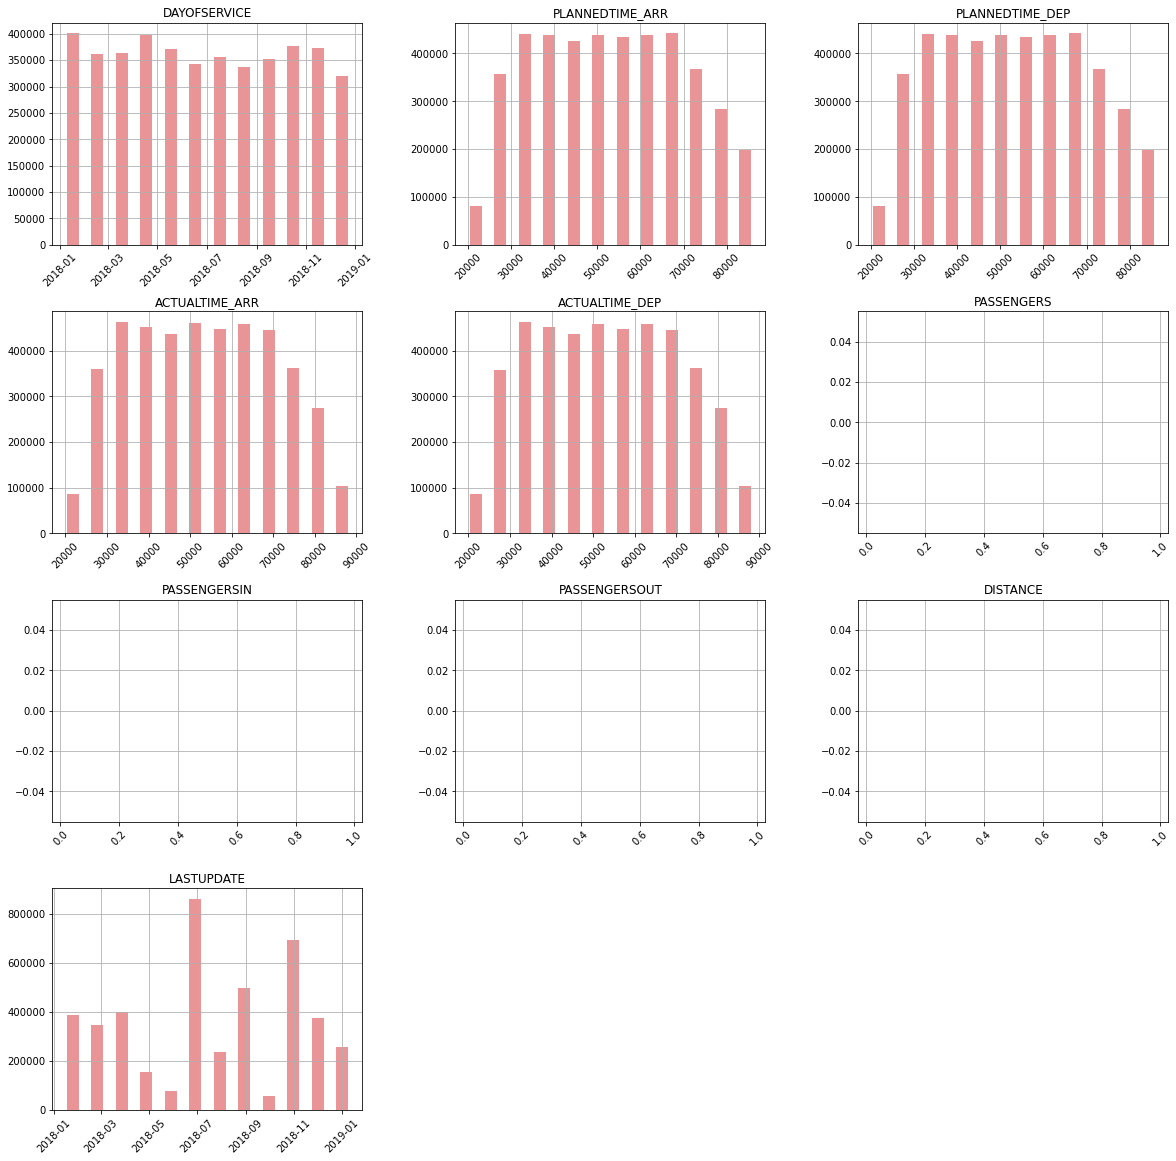

In [34]:
# Plot the histograms of all continuous features.
plt.figure()
df.hist(figsize=(20, 20),xrot=45, bins=12, rwidth=0.5, color=['#E99497'])

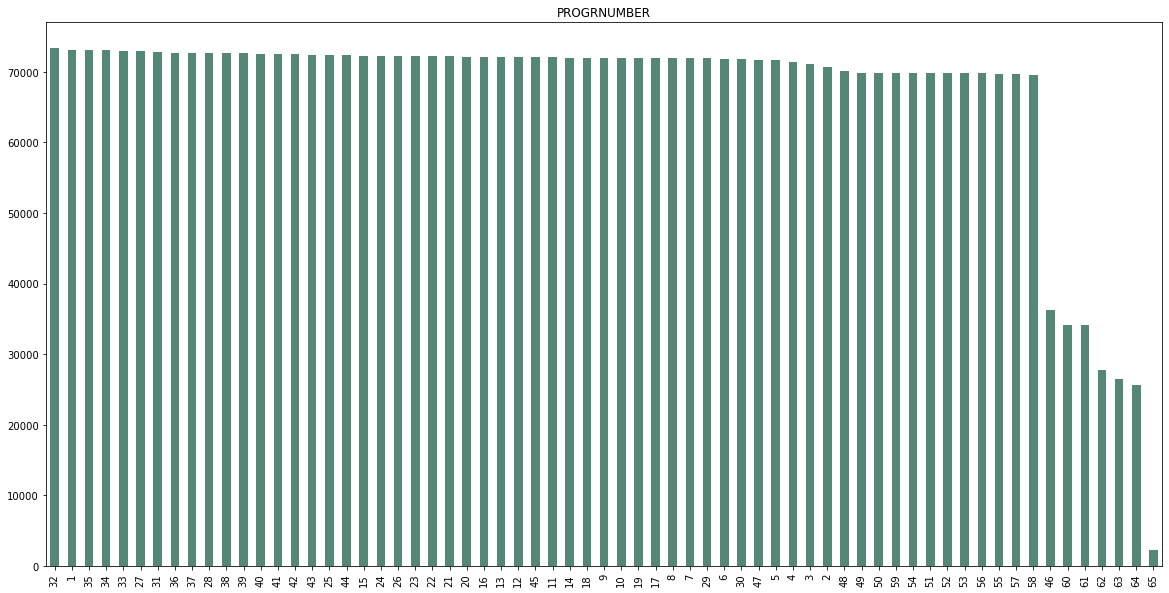

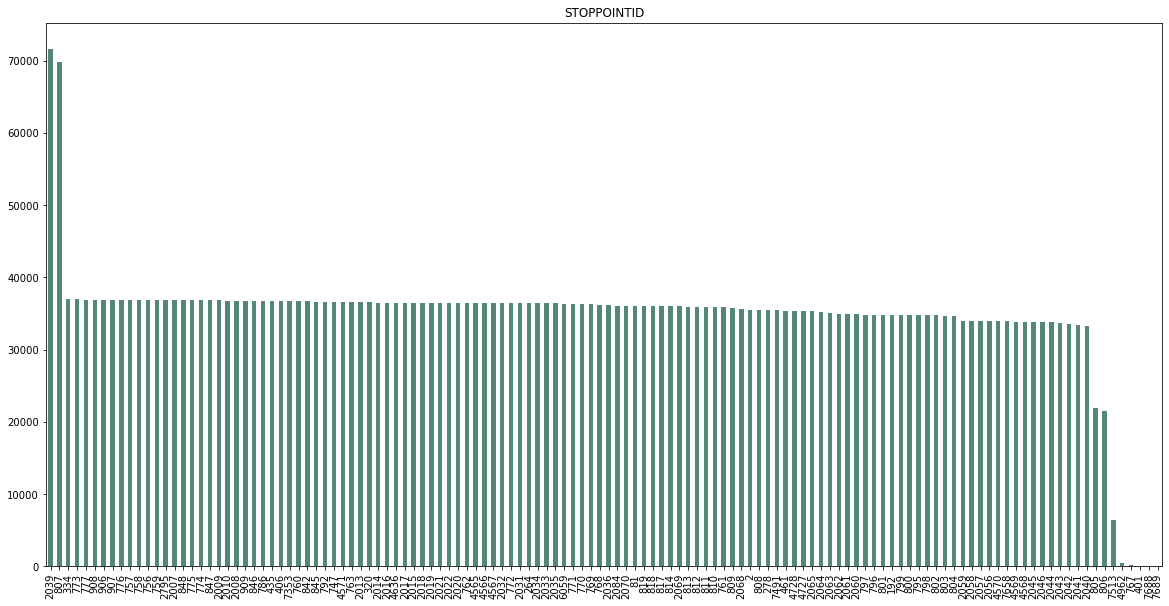

In [35]:
# Plot bar charts for all categorical features and save them in a single PDF file
#categoricalPDF = PdfPages('DublinBusLeavetimes_DataQualityReport_CategoricalFeatures_barcharts.pdf')
# Select columns containing categorical data
categorical_columns_Plot = df[['PROGRNUMBER','STOPPOINTID']].columns

for col in categorical_columns_Plot:
        f = df[col].value_counts().plot.bar(stacked=True, color="#558776", figsize=(20,10)) 
        plt.title(col)
        #categoricalPDF.savefig(f.get_figure(), bbox_inches='tight')
        plt.show()
        
#categoricalPDF.close() 

### Categorical features descriptive statistics conclusions

There is not much insight to be gained from the descriptive statistics of the categorical features here.

- The most frequent TRIPID ocurrs in less than 1% of the dataset.
    - Therefore it is unlikely that a particular TRIPID is going to indicate a longer or shorter arrival time.
- The most frequently ocurring value for each of the features occurs – at most – in 1.98% of the dataset.
    - Therefore there is an wide distribution of values for each feature.
- The SUPPRESSED and JUSTIFICATIONID are over 99% null and NOTE is 100% null.
    - Thse features will be dropped as part of the data quality plan later.

# Data Understanding: Data Quality Plan
In this section we list all features and the observations and actions involving those features, as a step towards obtaining a cleaner dataset.

In [36]:
# List all features that need to be discussed in the data quality plan
df.nunique()

DATASOURCE             1
DAYOFSERVICE         360
TRIPID             23279
PROGRNUMBER           65
STOPPOINTID          126
PLANNEDTIME_ARR    65347
PLANNEDTIME_DEP    65347
ACTUALTIME_ARR     68077
ACTUALTIME_DEP     68069
VEHICLEID            320
PASSENGERS             0
PASSENGERSIN           0
PASSENGERSOUT          0
DISTANCE               0
SUPPRESSED             2
JUSTIFICATIONID     2795
LASTUPDATE           360
NOTE                   0
dtype: int64

In [37]:
df.dtypes

DATASOURCE               category
DAYOFSERVICE       datetime64[ns]
TRIPID                   category
PROGRNUMBER              category
STOPPOINTID              category
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR              int64
ACTUALTIME_DEP              int64
VEHICLEID                category
PASSENGERS                float64
PASSENGERSIN              float64
PASSENGERSOUT             float64
DISTANCE                  float64
SUPPRESSED               category
JUSTIFICATIONID          category
LASTUPDATE         datetime64[ns]
NOTE                     category
dtype: object

# Data Quality Plan for CDC Dataset
This section details the data quality plan and the actions required to provide a cleaner dataset

    
| Feature                 | Data Quality Issue         | Handling Strategy         |
|-------------------------|----------------------      |------------------------   |
|
DATASOURCE (category)         | Single value (constant column)      | Drop the column     
DAYOFSERVICE (datetime)      |  0.12% values are missing | Investigate rows affected as small percentage, consider imputation|
TRIPID (category)             | Missing Values (0.16%)   | Investigate rows affected, consider dropping the columns  | 
PROGRNUMBER (category)           | Missing Values(0.86%) | Investigate rows affected, consider imputation for missing data|   
STOPPOINTID (category)                | Missing Values (23.39%) | Investigate rows affected, consider imputation for missing|
VEHICLEID (category)    | Missing Values (76.39%) | Too many missing values, drop feature|
PASSENGERS (float64)                  | Missing Values (100%) | Too many missing values, drop feature |
PASSENGERSIN (float64)                 | Missing Values (100%) | Too many missing values, drop feature|  
PASSENGERSOUT (float64)                    | Missing Values (100%) | Too many missing values, drop feature |   
DISTANCE (float64)             | Missing Values (100%) | Too many missing values, drop feature |
SUPPRESSED	(category)               | Missing values (99.48%) | Too many missing values, drop feature |
JUSTIFICATIONID (category)         | Missing values (99.48%) | Too many missing values, drop feature|
LASTUPDATE (datetime)         | Missing values (48.75%) | Investigate rows affected, consider dropping the row|
NOTE (category)         | Missing values (48.75%) | Investigate rows affected, consider dropping the row|
ARR_PLAN (datetime)         | Missing values (48.75%) | Investigate rows affected, consider dropping the row|
DEP_PLAN (datetime)         | Missing values (48.75%) | Investigate rows affected, consider dropping the row|
ARR_ACT (datetime)         | Missing values (48.75%) | Investigate rows affected, consider dropping the row|
DEP_ACT (datetime)         | Missing values (48.75%) | Investigate rows affected, consider dropping the row|

# Implementating the data quality strategy

Investigations of the features indicate that following columns can be dropped:

- DATASOURCE
- PASSENGERS
- PASSENGERSIN
- PASSENGERSOUT
- DISTANCE
- JUSTIFICATIONID
- NOTE
<br>
The following columns will be imputated as their missing values fall below the threshold of less than 30% of the value and can therefore be imputated with the most frequent value (mode) of the data set to fill for missing values. 

In [38]:
# Drop columns DATASOURCE, PASSENGERS, PASSENGERSIN, PASSENGERSOUT, DISTANCE, JUSTIFICATIONID, NOTE due to the large amount of missing values
df.drop(columns=['DATASOURCE', 'PASSENGERS', 'PASSENGERSIN', 'PASSENGERSOUT', 'DISTANCE', 'JUSTIFICATIONID','NOTE'], inplace=True)

In [39]:
df.drop(columns=['LASTUPDATE'], inplace=True)

In [40]:
# get all DAYOFSERVICE and TRIPID that have a SUPPRESSED value of 1.0
suppressed = df[df['SUPPRESSED']==1.0][['TRIPID', 'DAYOFSERVICE']]
suppressed

,TRIPID,DAYOFSERVICE
2379,5972182,2018-01-01
2509,5972182,2018-01-01
3579,5958392,2018-01-01
3633,5958392,2018-01-01
3688,5958392,2018-01-01
...,...,...
4343465,8586161,2018-12-31
4343466,8586161,2018-12-31
4343467,8586161,2018-12-31
4345744,8583639,2018-12-31


In [41]:
suppressed.reset_index(drop=True, inplace=True)

In [42]:
dropIndex = []
for i in range(suppressed.shape[0]):
    workingDF = df[(df['TRIPID']==suppressed.loc[i,'TRIPID'])&\
                  (df['DAYOFSERVICE']==suppressed.loc[i,'DAYOFSERVICE'])]
    dropIndex.append(workingDF.index)
   

In [43]:
DropIndex = []
for i in dropIndex:
    for j in i:
        DropIndex.append(j) 
       

In [44]:
df.drop(DropIndex, inplace=True)

In [45]:
df.reset_index(drop=True, inplace=True)

In [46]:
# drop SUPPRESSED column
df.drop(columns='SUPPRESSED', inplace=True)


In [47]:
df.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID
0,2018-01-01,5970412,1,807,84600,84600,84442,84442,2868385
1,2018-01-01,5970412,2,808,84644,84644,84617,84617,2868385
2,2018-01-01,5970412,3,809,84670,84670,84631,84631,2868385
3,2018-01-01,5970412,6,812,84754,84754,84676,84676,2868385
4,2018-01-01,5970412,7,813,84776,84776,84691,84691,2868385


In [48]:
# drop PLANNEDTIME_DEP column
df.drop(columns='PLANNEDTIME_DEP', inplace=True)

In [49]:
# drop VEHICLEID column
df.drop(columns='VEHICLEID', inplace=True)

In [50]:
# rename PLANNEDTIME_DEP column
df.rename(columns={'PLANNEDTIME_ARR':'ARR/DEP_PLAN'}, inplace=True)

In [51]:
df

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,ARR/DEP_PLAN,ACTUALTIME_ARR,ACTUALTIME_DEP
0,2018-01-01,5970412,1,807,84600,84442,84442
1,2018-01-01,5970412,2,808,84644,84617,84617
2,2018-01-01,5970412,3,809,84670,84631,84631
3,2018-01-01,5970412,6,812,84754,84676,84676
4,2018-01-01,5970412,7,813,84776,84691,84691
...,...,...,...,...,...,...,...
4254320,2018-12-31,8577864,1,2039,33000,33126,33126
4254321,2018-12-31,8583659,1,2039,67200,67044,67044
4254322,2018-12-31,8579935,1,2039,72000,72081,72081
4254323,2018-12-31,8589276,1,2039,64800,64818,64818


In [52]:
# save what we have so far to a csv
df.to_csv(RouteLeavetimesCleaned, index_label=False)